Saved: Charlottesville_2025-11-12_16-20_airmass_all_targets.png


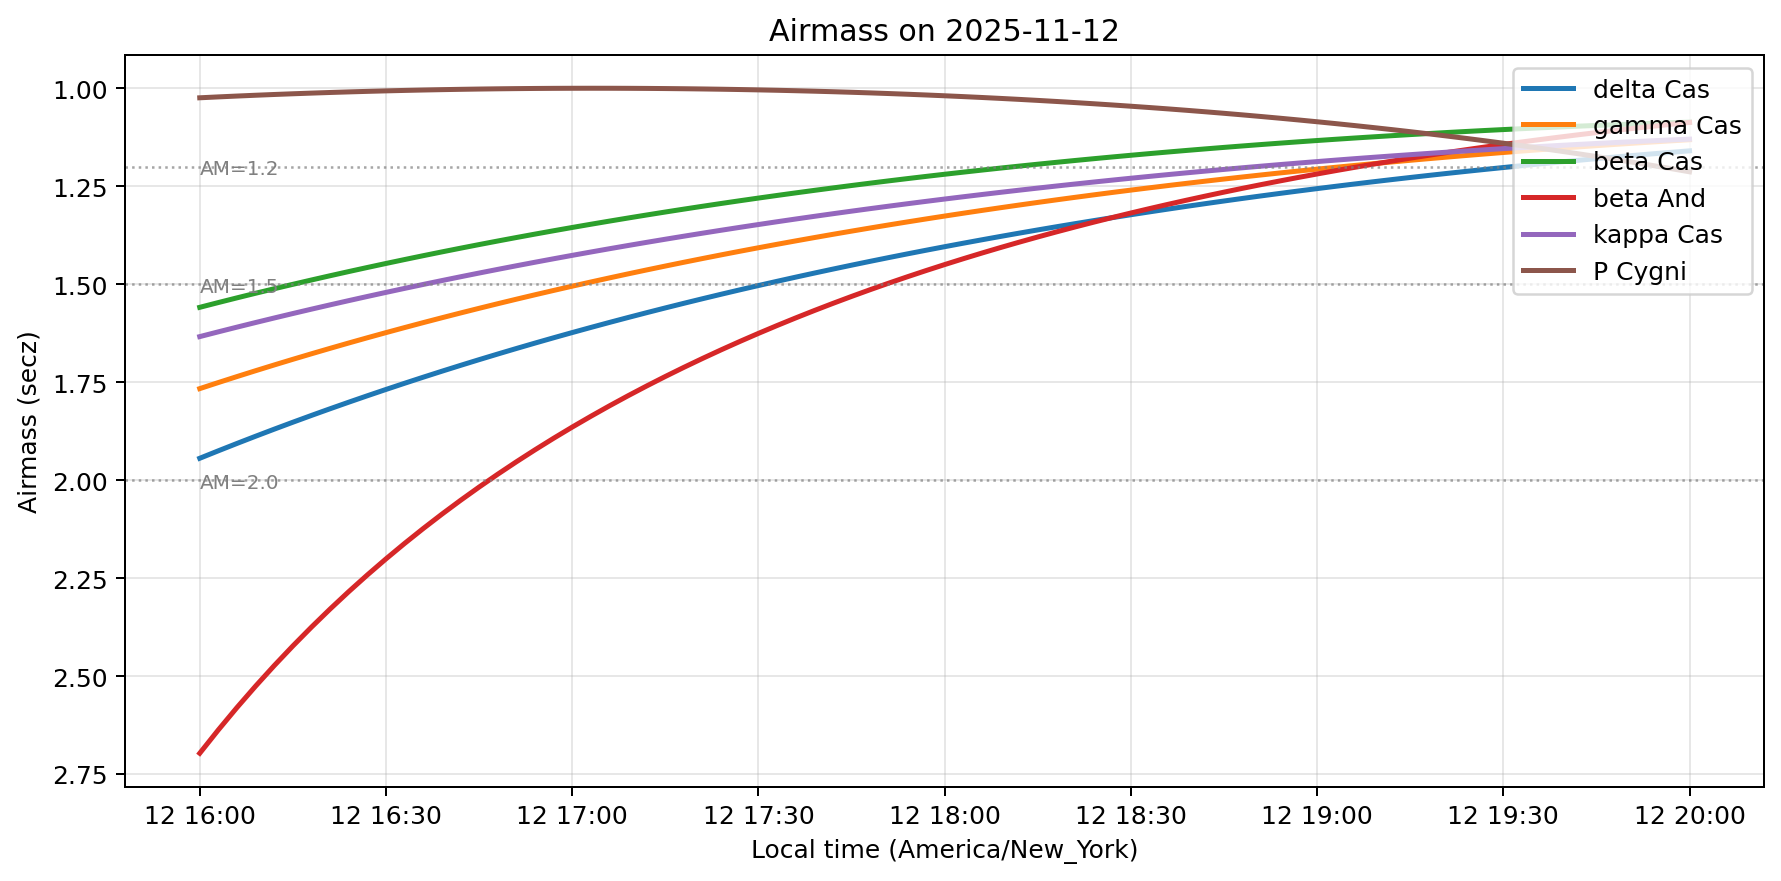

Saved: Charlottesville_2025-11-12_16-20_altitude_all_targets.png


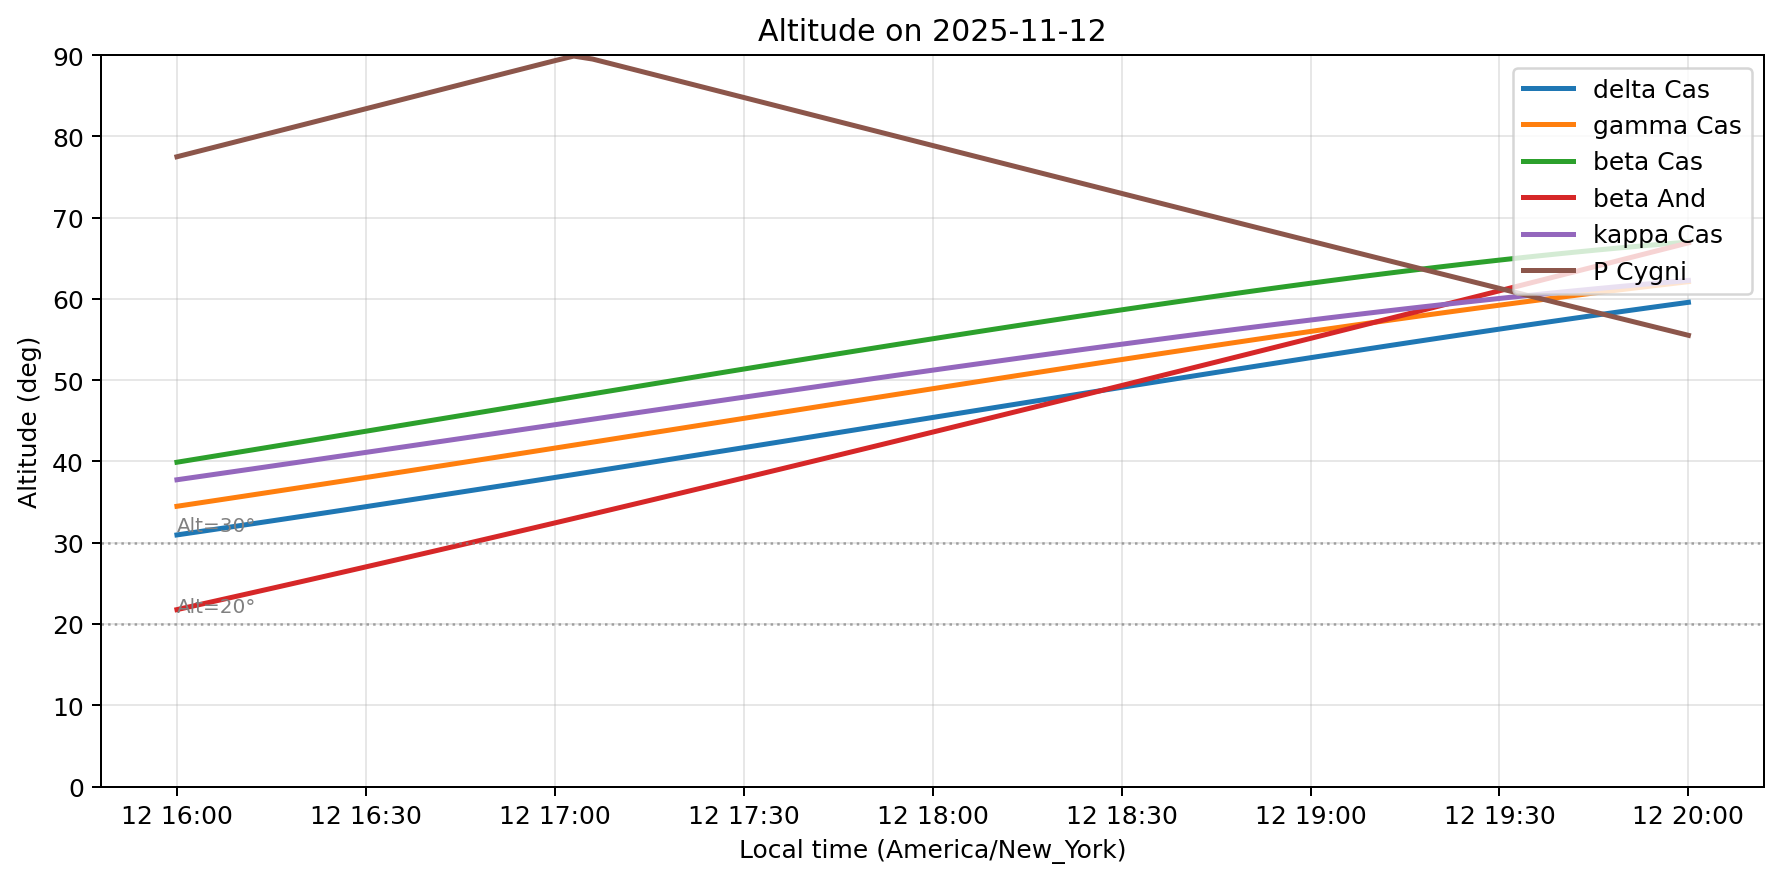

In [4]:
#!/usr/bin/env python3
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroplan import Observer, FixedTarget

# ----------------- Configuration -----------------
# Local civil date (at Charlottesville) you want to observe:
local_night = "2025-11-12"        # "YYYY-MM-DD"
time_step_min = 3                 # sampling cadence for plots (minutes)

# Charlottesville, VA (approx)
charlottesville = EarthLocation.from_geodetic(
    lon=-78.48*u.deg, lat=38.03*u.deg, height=180*u.m
)
observer = Observer(location=charlottesville,
                    name="Charlottesville",
                    timezone="America/New_York")

# Targets (ICRS)
targets = [
    ("delta Cas", SkyCoord("01h25m48.9s", "+60d14m07s", frame="icrs")),
    ("gamma Cas", SkyCoord("00h56m43s",   "+60d43m00s", frame="icrs")),
    ("beta Cas",  SkyCoord("00h09m10.7s", "+59d08m59s", frame="icrs")),
    ("beta And",  SkyCoord("01h09m43.9s", "+35d37m14s", frame="icrs")),
    ("kappa Cas", SkyCoord("00h33m00s",   "+62d55m54s", frame="icrs")),
    ("P Cygni", SkyCoord("20h17m47.2s", "+38d01m58.6s", frame="icrs")),
]
# -------------------------------------------------

# Build time grid from 4 pm to 8 pm local on that date
year, month, day = map(int, local_night.split("-"))
tz = observer.timezone

start_local = tz.localize(dt.datetime(year, month, day, 16, 0, 0))  # 4 pm
end_local   = tz.localize(dt.datetime(year, month, day, 20, 0, 0))  # 8 pm

# Make an array of local datetimes, then convert to astropy Time
n_steps = int((end_local - start_local).total_seconds() // (time_step_min*60)) + 1
local_datetimes = [start_local + dt.timedelta(minutes=time_step_min*i)
                   for i in range(n_steps)]
times = Time(local_datetimes)
tloc = local_datetimes  # for plotting on x-axis

# Common AltAz frame
altaz_frame = AltAz(obstime=times, location=charlottesville)

# ------------ Airmass plot (all targets) ------------
plt.figure(figsize=(10, 5), dpi=180)

for targ_name, targ_coord in targets:
    target = FixedTarget(coord=targ_coord, name=targ_name)
    altaz_targ = target.coord.transform_to(altaz_frame)
    airmass = altaz_targ.secz.value
    airmass[~np.isfinite(airmass)] = np.nan

    plt.plot(tloc, airmass, lw=2, label=targ_name)

# Make lower airmass at the top
plt.gca().invert_yaxis()

# Reference lines
for am, lab in [(1.2, "AM=1.2"), (1.5, "AM=1.5"), (2.0, "AM=2.0")]:
    plt.axhline(am, color='gray', lw=1, ls=':', alpha=0.7)
    plt.text(tloc[0], am+0.03, lab, color='gray', fontsize=8, va='bottom')

plt.title(f"Airmass on {local_night}")
plt.ylabel("Airmass (secz)")
plt.xlabel(f"Local time ({observer.timezone})")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()

out_png_airmass = f"Charlottesville_{local_night}_16-20_airmass_all_targets.png"
plt.savefig(out_png_airmass, dpi=160)
print(f"Saved: {out_png_airmass}")
plt.show()

# ------------ Altitude plot (all targets) ------------
plt.figure(figsize=(10, 5), dpi=180)

for targ_name, targ_coord in targets:
    target = FixedTarget(coord=targ_coord, name=targ_name)
    altaz_targ = target.coord.transform_to(altaz_frame)
    alt_deg = altaz_targ.alt.degree

    plt.plot(tloc, alt_deg, lw=2, label=targ_name)

# Reference altitude lines
for alt, lab in [(20, "Alt=20°"), (30, "Alt=30°")]:
    plt.axhline(alt, color='gray', lw=1, ls=':', alpha=0.7)
    plt.text(tloc[0], alt+1, lab, color='gray', fontsize=8, va='bottom')

plt.title(f"Altitude on {local_night}")
plt.ylabel("Altitude (deg)")
plt.xlabel(f"Local time ({observer.timezone})")
plt.ylim(0, 90)
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()

out_png_alt = f"Charlottesville_{local_night}_16-20_altitude_all_targets.png"
plt.savefig(out_png_alt, dpi=160)
print(f"Saved: {out_png_alt}")
plt.show()